In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<h3 style="color:#FF8C00">Titanic data<h3>

In [51]:
titanicdf = pd.read_csv('./train.csv')
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
titanicdf.duplicated().value_counts()

False    891
dtype: int64

In [54]:
from sklearn.preprocessing import  OrdinalEncoder

In [55]:
ord_enc = OrdinalEncoder()
titanicdf['Sex'] = ord_enc.fit_transform(titanicdf[['Sex']])
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#titanicdf =  pd.get_dummies(titanicdf, columns=['Sex'])  #get sex column to dummie var

Solve NaN in Age column

In [57]:
titanicdf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
titanicdf.Age.median()

28.0

<AxesSubplot:xlabel='Age'>

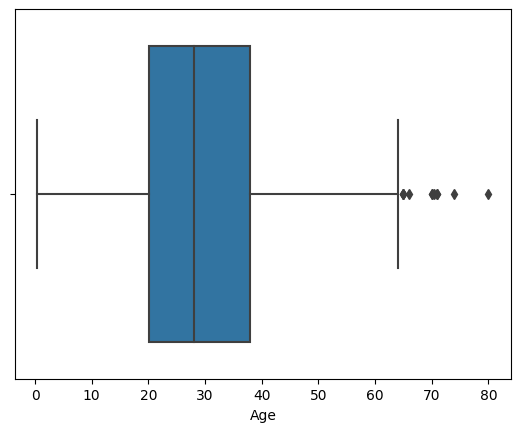

In [59]:
sns.boxplot(x='Age', data=titanicdf)

In [60]:
titanicdf.Age.fillna(value=28.0, inplace=True)
titanicdf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
titanicdf.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Drop not valuavle columns

In [62]:
titanicdf.drop(columns=['Ticket', 'Cabin', 'Name'], inplace=True)
titanicdf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,S
1,2,1,1,0.0,38.0,1,0,71.2833,C
2,3,1,3,0.0,26.0,0,0,7.9250,S
3,4,1,1,0.0,35.0,1,0,53.1000,S
4,5,0,3,1.0,35.0,0,0,8.0500,S


Replace Nan in Embarked column with 'S'

In [63]:
titanicdf.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
titanicdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [65]:
titanicdf.Embarked.fillna(value='S', inplace=True)
titanicdf.Embarked.isna().sum()

0

In [66]:
titanicdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Change Embarked to number

In [67]:
titanicdf = pd.get_dummies(data=titanicdf, columns=['Embarked'], )
titanicdf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,22.0,1,0,7.2500,0,0,1
1,2,1,1,0.0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0.0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0.0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1.0,35.0,0,0,8.0500,0,0,1


<AxesSubplot:>

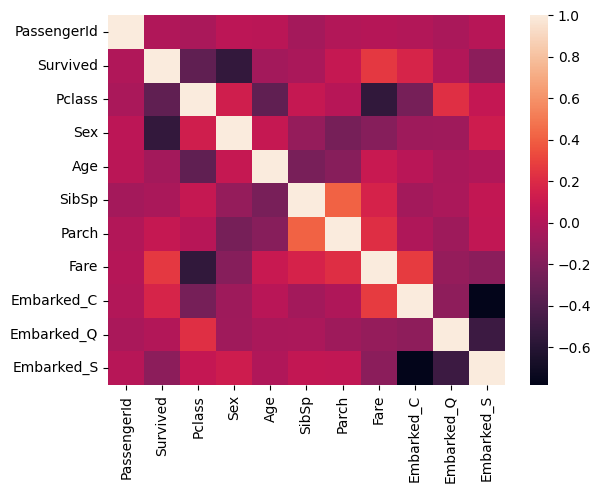

In [68]:
sns.heatmap(data=titanicdf.corr())

<h5 style="color:#FF8C00">Logit<h5>

In [69]:
from sklearn.linear_model  import LogisticRegression

In [70]:
y_trian = titanicdf['Survived']
y_trian.shape

(891,)

In [71]:
X_train= titanicdf.drop(columns=['Survived','PassengerId'])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,22.0,1,0,7.2500,0,0,1
1,1,0.0,38.0,1,0,71.2833,1,0,0
2,3,0.0,26.0,0,0,7.9250,0,0,1
3,1,0.0,35.0,1,0,53.1000,0,0,1
4,3,1.0,35.0,0,0,8.0500,0,0,1


In [72]:
model = LogisticRegression(solver='lbfgs', max_iter=10000 )
model.fit(X_train, y_trian)

LogisticRegression(max_iter=10000)

In [73]:
model.score(X_train, y_trian)

0.8002244668911336

80% in  train model

In [74]:
testdf = pd.read_csv('./test.csv')
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
testdf.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [77]:
testdf = pd.get_dummies(data=testdf, columns=['Embarked'] )
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,0,1,0
1,893,3,female,47.0,1,0,7.0000,0,0,1
2,894,2,male,62.0,0,0,9.6875,0,1,0
3,895,3,male,27.0,0,0,8.6625,0,0,1
4,896,3,female,22.0,1,1,12.2875,0,0,1


In [78]:
testdf['Sex'] = ord_enc.fit_transform(testdf[['Sex']])
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1.0,34.5,0,0,7.8292,0,1,0
1,893,3,0.0,47.0,1,0,7.0000,0,0,1
2,894,2,1.0,62.0,0,0,9.6875,0,1,0
3,895,3,1.0,27.0,0,0,8.6625,0,0,1
4,896,3,0.0,22.0,1,1,12.2875,0,0,1


In [79]:
testdf.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [80]:
testdf.Age.fillna(value=30, inplace=True)   #remove nan in Age column
testdf.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [81]:
testdf.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

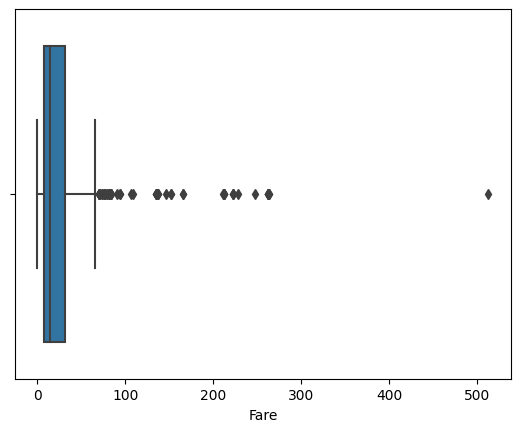

In [82]:
sns.boxplot(x=testdf.Fare)

In [83]:
testdf.Fare.median()

14.4542

In [84]:
testdf.Fare.fillna(value=14, inplace=True)   #remove nan in Fare column
testdf.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [85]:
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1.0,34.5,0,0,7.8292,0,1,0
1,893,3,0.0,47.0,1,0,7.0000,0,0,1
2,894,2,1.0,62.0,0,0,9.6875,0,1,0
3,895,3,1.0,27.0,0,0,8.6625,0,0,1
4,896,3,0.0,22.0,1,1,12.2875,0,0,1


In [86]:
X_test = testdf.drop(columns=['PassengerId'])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,34.5,0,0,7.8292,0,1,0
1,3,0.0,47.0,1,0,7.0000,0,0,1
2,2,1.0,62.0,0,0,9.6875,0,1,0
3,3,1.0,27.0,0,0,8.6625,0,0,1
4,3,0.0,22.0,1,1,12.2875,0,0,1


In [87]:
survived_prediction = model.predict(X_test)
survived_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
%store survived_prediction   #store variable to read on different notebook

Stored 'survived_prediction' (ndarray)


UsageError: Unknown variable '#store'


In [88]:
survived_prediction.shape

(418,)

In [89]:
passangerid = testdf['PassengerId']
passangerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [90]:
datos = {'PassengerId': passangerid, 'Survived': survived_prediction }
final_answear = pd.DataFrame(datos)
final_answear

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
final_answear.to_csv('./prediction2.csv', index=False)

<h5 style="color:#FF8C00">DecTree<h5>

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
treemodel = DecisionTreeClassifier()

In [94]:
treemodel.fit(X_train, y_trian)

DecisionTreeClassifier()

In [95]:
surtree_predict = treemodel.predict(X_test)
surtree_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
treemodel.score(X_train, y_trian)

0.9797979797979798

In [97]:
datos = {'PassengerId': passangerid, 'Survived': surtree_predict }
final_answear = pd.DataFrame(data=datos)
final_answear.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [98]:
final_answear.to_csv('./prediction3.csv', index=False)

DecTree better on train set, not in test. So Logit is still best model